# **Project Name**    -  Airline Passenger Referral prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**  Sudipta Samanta

# **Project Summary -**

In this project, we will use machine learning algorithms to predict whether a passenger will refer an airline to others. We will use a dataset that includes past passengers and their referral behavior, as well as various features such as flight class, and route information etc.

# **GitHub Link -**

https://github.com/sudipta-DS

# **Problem Statement**


**Customer referral is a crucial aspect of business growth and success, and the airline industry is no exception. Satisfied passengers who have had positive experiences with an airline are more likely to refer the airline to their friends, family, and colleagues. Identifying these potential advocates can help airlines improve customer satisfaction and loyalty and attract new customers.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import LabelEncoder,StandardScaler

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_excel('/content/drive/MyDrive/Sudipta/data_airline_reviews.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Number of rows = ",df.shape[0])
print("Number of cols = ",df.shape[1])

Number of rows =  131895
Number of cols =  17


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

True     70711
False    61184
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
null_value_count = list(df.isnull().sum().values)
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

### What did you know about your dataset?

Till now, we have seen -
* our dataset has 131895 rows and 17 columns initially.
* 70711 rows are duplicated.
* aircraft column has most null values.
* Our Dependent Variable is categorical in nature.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Variables Description

* airline : Name of the airine.

* overall : Overall points are given to the trip between 10

* author : Author of the trip

* reviewdate : Date of the Review customer

* aircraft : Type of the aircraft

* travellertype : Type of traveler (e.g. business, leisure)

* Flight date : Cabin at the flight date flown

* cabin service : Rated between

* foodbev : Rated between 1-5 entertainment: Rated between 1-5

* groundservice : Rated between 1-5

* valueformoney : Rated between 1-5

* recommended : Binary, target variable.



**Description Metric details :**

*   count - Total number of non-null values in each column
*   mean - Mean of each column
*   std - Standard Deviation of each column
*   min - Minimum value of each column
*  25% - First Quartile(Q1) of each column
*  50% - Second Quartile(Q2) or Median of each column
*   75% - Third Quartile(Q3) of each column
*   max - Maximum value of each column






### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
df.drop_duplicates(inplace=True)

### What all manipulations have you done and insights you found?


*   Dropped Duplicate rows to reduce computational complexity.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

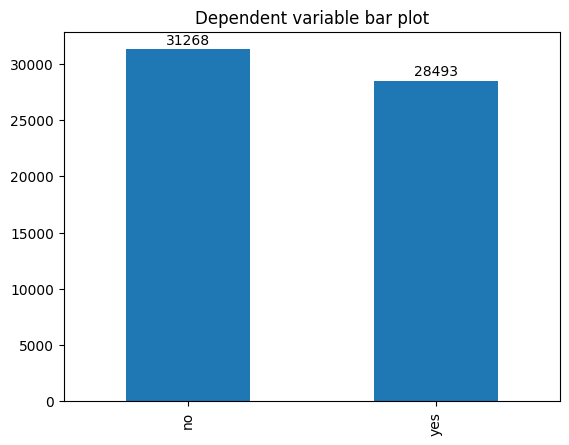

In [ ]:
# Chart - 1 visualization code
df['recommended'].value_counts().plot(kind='bar')

y_coordinates = df['recommended'].value_counts().values
x_coordinates = [i for i in range(2)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Dependent variable bar plot')

plt.show()

##### 1. Why did you pick the specific chart?

I pick that above chart to understand the distribution of our dependent variable**('recommended')**.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see non-recommended bar is much higher than recommended bar.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If our old customers dont recommend flights . It will be negative for business.

#### Chart - 2

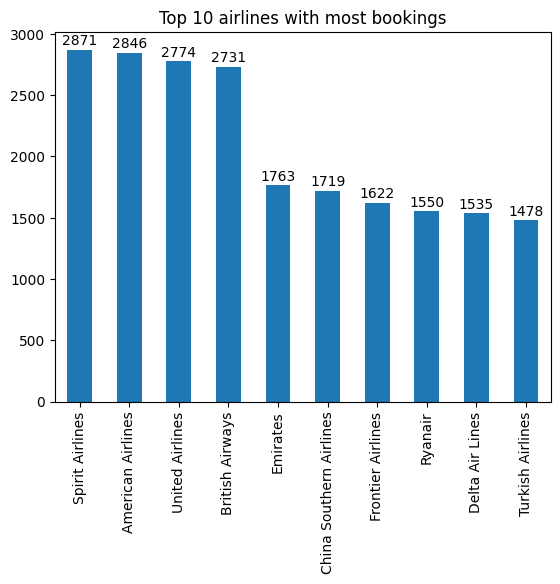

In [ ]:
# Chart - 2 visualization code
df['airline'].value_counts()[:10].plot(kind='bar')

y_coordinates = df['airline'].value_counts().values
x_coordinates = [i for i in range(10)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Top 10 airlines with most bookings')

plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand the top 10 airlines with most bookings.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can say that **Spirit Airlines** had got most bookings. and **Turkish Airlines** had got less bookings among top 10 airlines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most booked airlines are more referred by customers and on the other hand less booked airlines are less referred by customers .It will lead us to negative growth.

#### Chart - 3

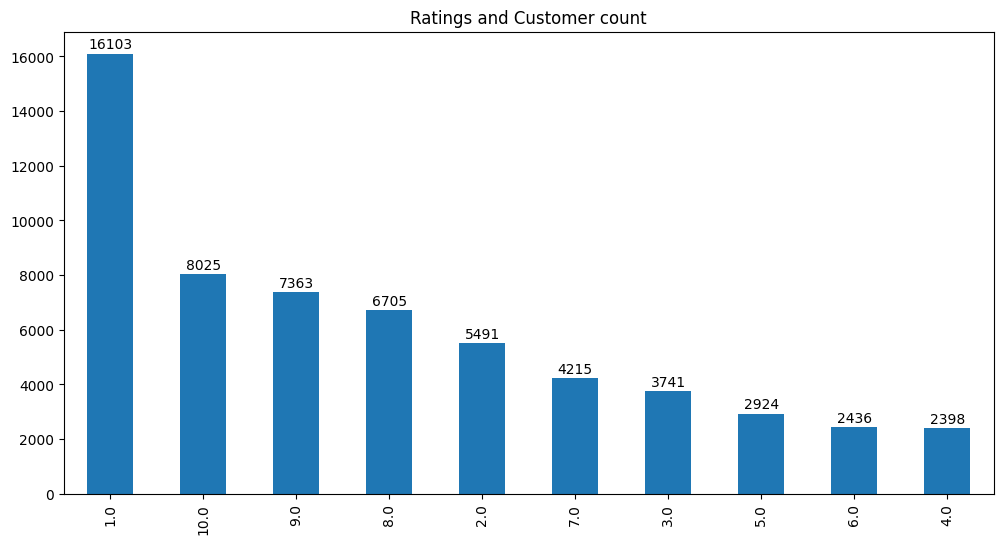

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(12,6))
df['overall'].value_counts().plot(kind='bar')

y_coordinates = df['overall'].value_counts().values
x_coordinates = [i for i in range(10)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Ratings and Customer count')

plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand the ratings and number of customers who give those counts.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see most of the customers gave 1 rating .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the customers gave low ratings which is negative for business growth.

#### Chart - 4

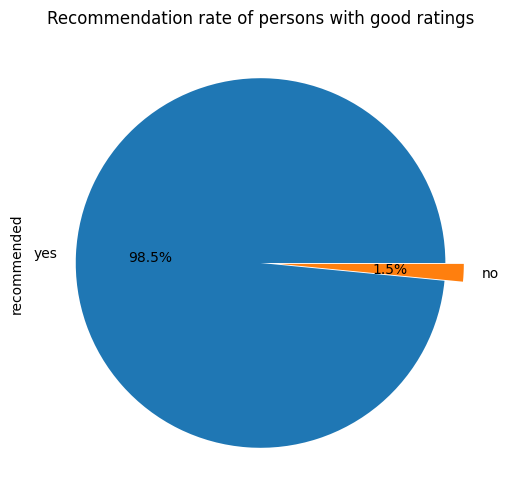

In [ ]:
plt.figure(figsize=(12,6))
df_good_rate = df[df['overall']>=7.0]
df_good_rate['recommended'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.1])
plt.title('Recommendation rate of persons with good ratings')
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand whether a person who gave good ratings earlier referred airlines to their friends or not.

##### 2. What is/are the insight(s) found from the chart?

From above chart we can see **98.5 %** customers who gave good ratings earlier they referred airlines to their friends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Apparently we can say that a good percentage of customers refer airlines to their friends who gave good ratings earlier.. which is good for growth.

#### Chart - 5

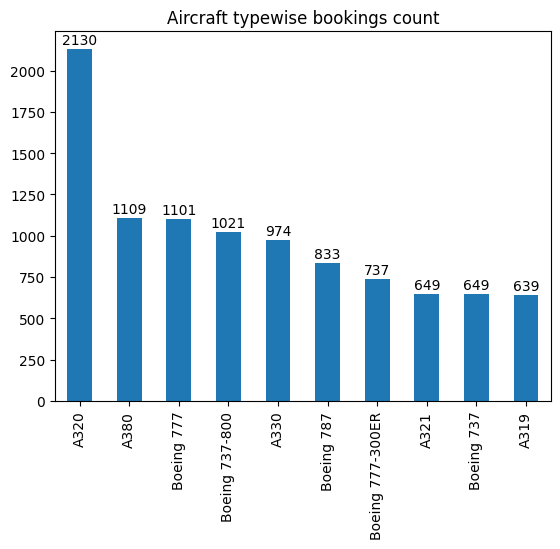

In [ ]:
# Chart - 5 visualization code
df['aircraft'].value_counts()[:10].plot(kind='bar')

y_coordinates = df['aircraft'].value_counts()[:10].values
x_coordinates = [i for i in range(10)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Aircraft typewise bookings count')


plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to see which aircraft has higher bookings and which aircraft has lower bookings.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see **A320** is the most booked airline. which may be reffered by most of the customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the customers booked **A320** type aircraft. which may be reffered by old customers. But we have to focus on less booked aircrafts which leading us to negative growth.

#### Chart - 6

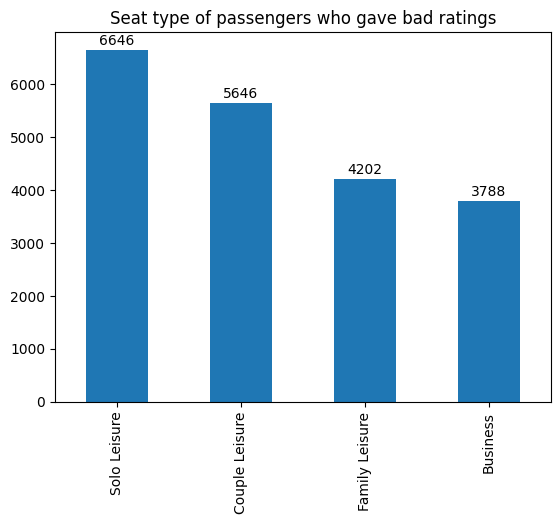

In [ ]:
# Chart - 6 visualization code
customers_bad_rate = df[df['overall']<=4.0]
customers_bad_rate['traveller_type'].value_counts().plot(kind='bar')

y_coordinates = customers_bad_rate['traveller_type'].value_counts().values
x_coordinates = [i for i in range(10)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Seat type of passengers who gave bad ratings')
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to see the Seat type of passengers who gave bad ratings.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that **Leisure category** customers most of the times gave us bad ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can observe that most of the times **Leisure category** customers most of the times gave us bad ratings. We have to focus on improvement in hospitalities in air. It will lead us to negative growth.

#### Chart - 7

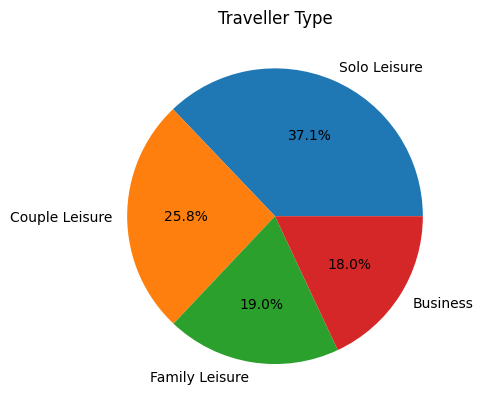

In [ ]:
# Chart - 7 visualization code
ax =df['traveller_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set(ylabel=None)
plt.title('Traveller Type')
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand the traveller type of our bookings.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that most of the bookings done by **Solo leisure** category people.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As business class is less booked. so we have to focus on more bookings of business classes. Or it will lead us to negative growth.

#### Chart - 8

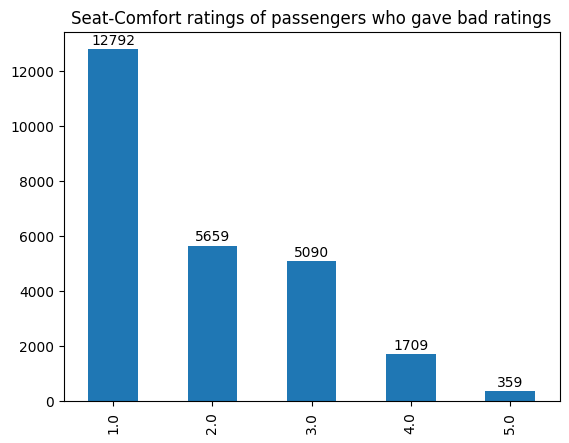

In [ ]:
# Chart - 8 visualization code
customers_bad_rate['seat_comfort'].value_counts().plot(kind='bar')

y_coordinates = customers_bad_rate['seat_comfort'].value_counts().values
x_coordinates = [i for i in range(5)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Seat-Comfort ratings of passengers who gave bad ratings')

plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand the Seat-Comfort ratings of passengers who gave bad ratings.

##### 2. What is/are the insight(s) found from the chart?

From above chart we can say almost all customers gave bad ratings on seat comfort who gave bad ratings overall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above chart we can say that we have to focus on seat styles,comfort,luggage areas etc.

#### Chart - 9

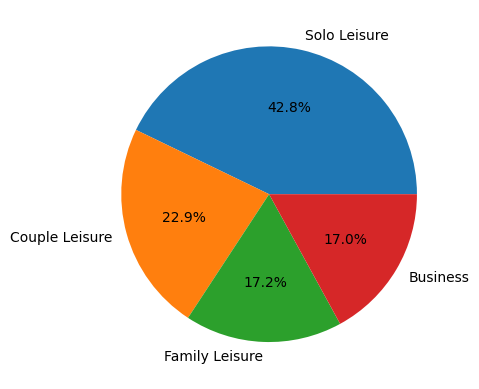

In [ ]:
# Chart - 9 visualization code
customers_with_refer = df[df['recommended']=='yes']
ax = customers_with_refer['traveller_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set(ylabel=None)
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand the customer booking categorywise distribution percentage

##### 2. What is/are the insight(s) found from the chart?

We can see that **42.8%** of our referrals comes from Solo leisure category peoples.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on more referrals from all category customers.

#### Chart - 10

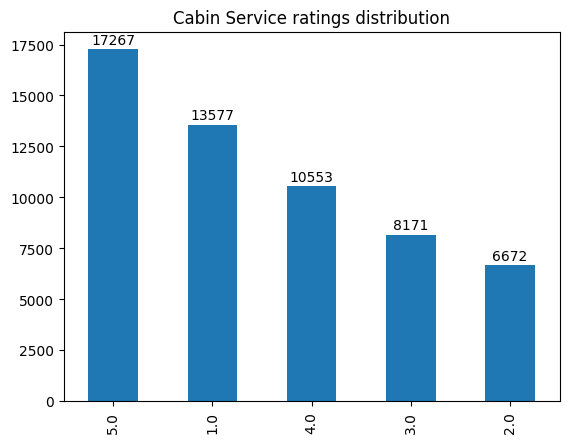

In [ ]:
# Chart - 10 visualization code
df['cabin_service'].value_counts().plot(kind='bar')

y_coordinates = df['cabin_service'].value_counts().values
x_coordinates = [i for i in range(5)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Cabin Service ratings distribution')

plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand Cabin crew ratings distribution.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see most of our clients gave us 5 star ratings or 1 star ratings on cabin services.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above chart we can say most of our clients give us either very good or worst ratings. So we have to focus on recruitement of more trained crews,add on services etc.

#### Chart - 11

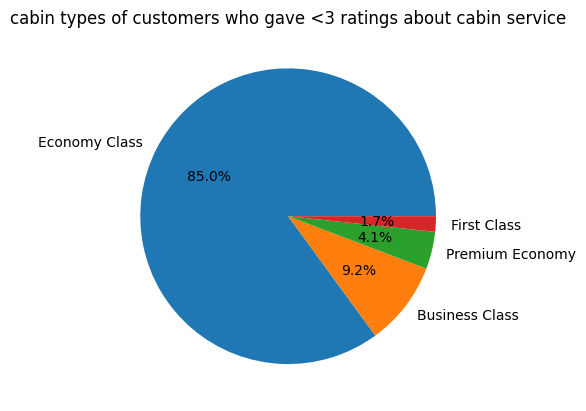

In [ ]:
# Chart - 11 visualization code
df_bad_cabin = df[df['cabin_service']<3.0]
ax = df_bad_cabin['cabin'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set(ylabel=None)
plt.title('cabin types of customers who gave <3 ratings about cabin service')
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand cabin types of customers who gave <3 ratings about cabin service.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see **Economy class** peoples gave negative remarks on cabin services.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on behaviour with customers who booked for Economy class tickets.

#### Chart - 12

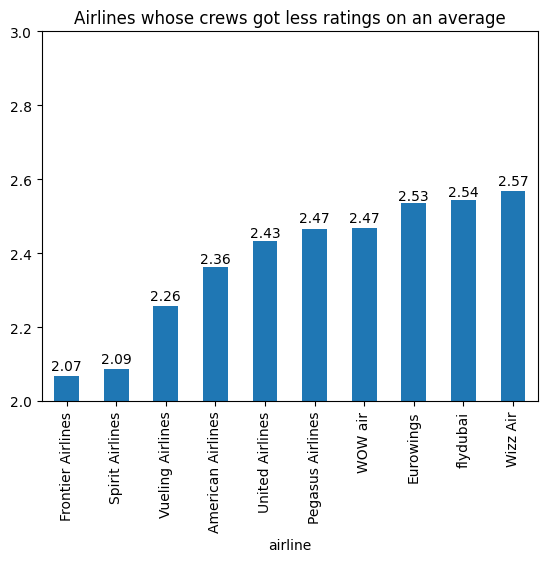

In [ ]:
# Chart - 12 visualization code
df.groupby('airline')['cabin_service'].mean().sort_values()[:10].plot(kind='bar')

y_coordinates = [round(i,2) for i in df.groupby('airline')['cabin_service'].mean().sort_values()[:10].values]
x_coordinates = [i for i in range(10)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Airlines whose crews got less ratings on an average')

plt.ylim([2.0,3.0])
plt.show()

##### 1. Why did you pick the specific chart?

I pick this chart to see the Airlines whose crews got less ratings on an average.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that **Frontier Airlines** got least average ratings on an average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will lead to negative growth of business. We have to focus on crew behaviours specially for above airlines.

#### Chart - 13

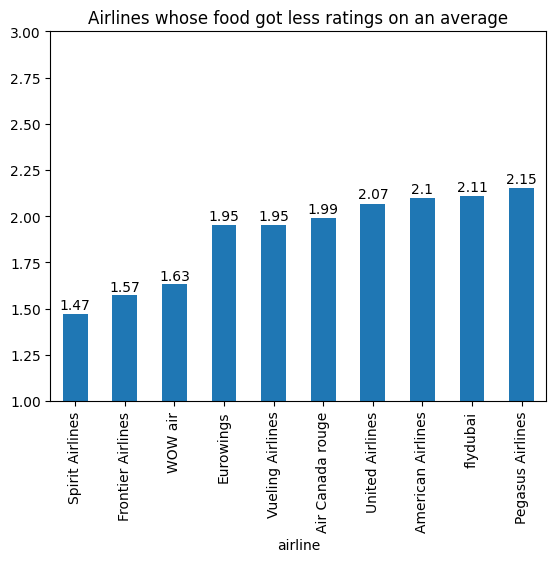

In [ ]:
# Chart - 13 visualization code
#df['food_bev'].value_counts().plot(kind='bar')
df.groupby('airline')['food_bev'].mean().sort_values()[:10].plot(kind='bar')

y_coordinates = [round(i,2) for i in df.groupby('airline')['food_bev'].mean().sort_values()[:10].values]
x_coordinates = [i for i in range(10)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Airlines whose food got less ratings on an average')

plt.ylim([1.0,3.0])

plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to see Airlines whose food got less ratings on an average.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see **spirit airlines** provides worst food to customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on increasing quality of food. Or it will lead to negative growth.

#### Chart - 14 - Correlation Heatmap

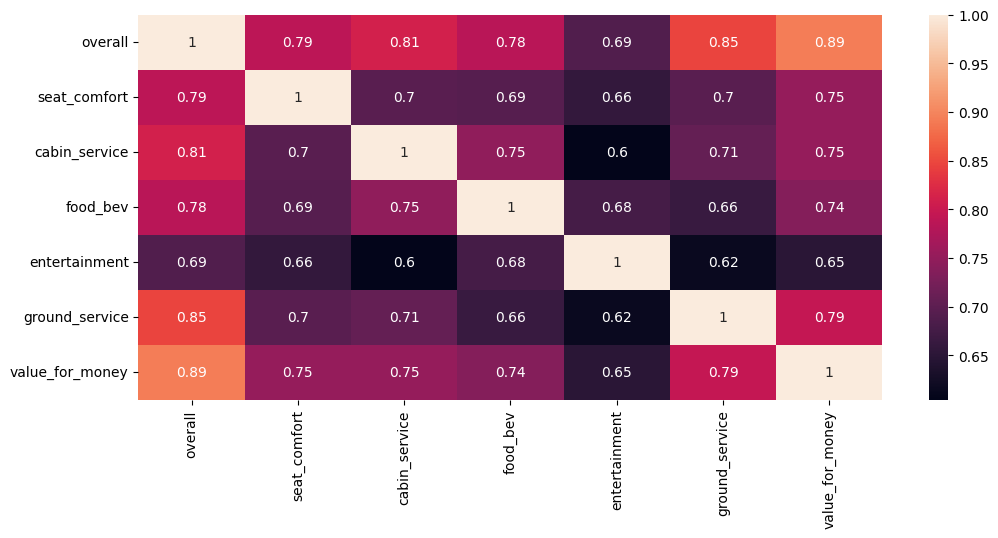

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,5))
corr_matrix = df.corr()
sns.heatmap(abs(df.corr()),annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

I pick that above correlation Heatmap to understand if there is any multi-colinearity.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see **Overall** column has huge collinearity with other columns.

#### Chart - 15 - Pair Plot

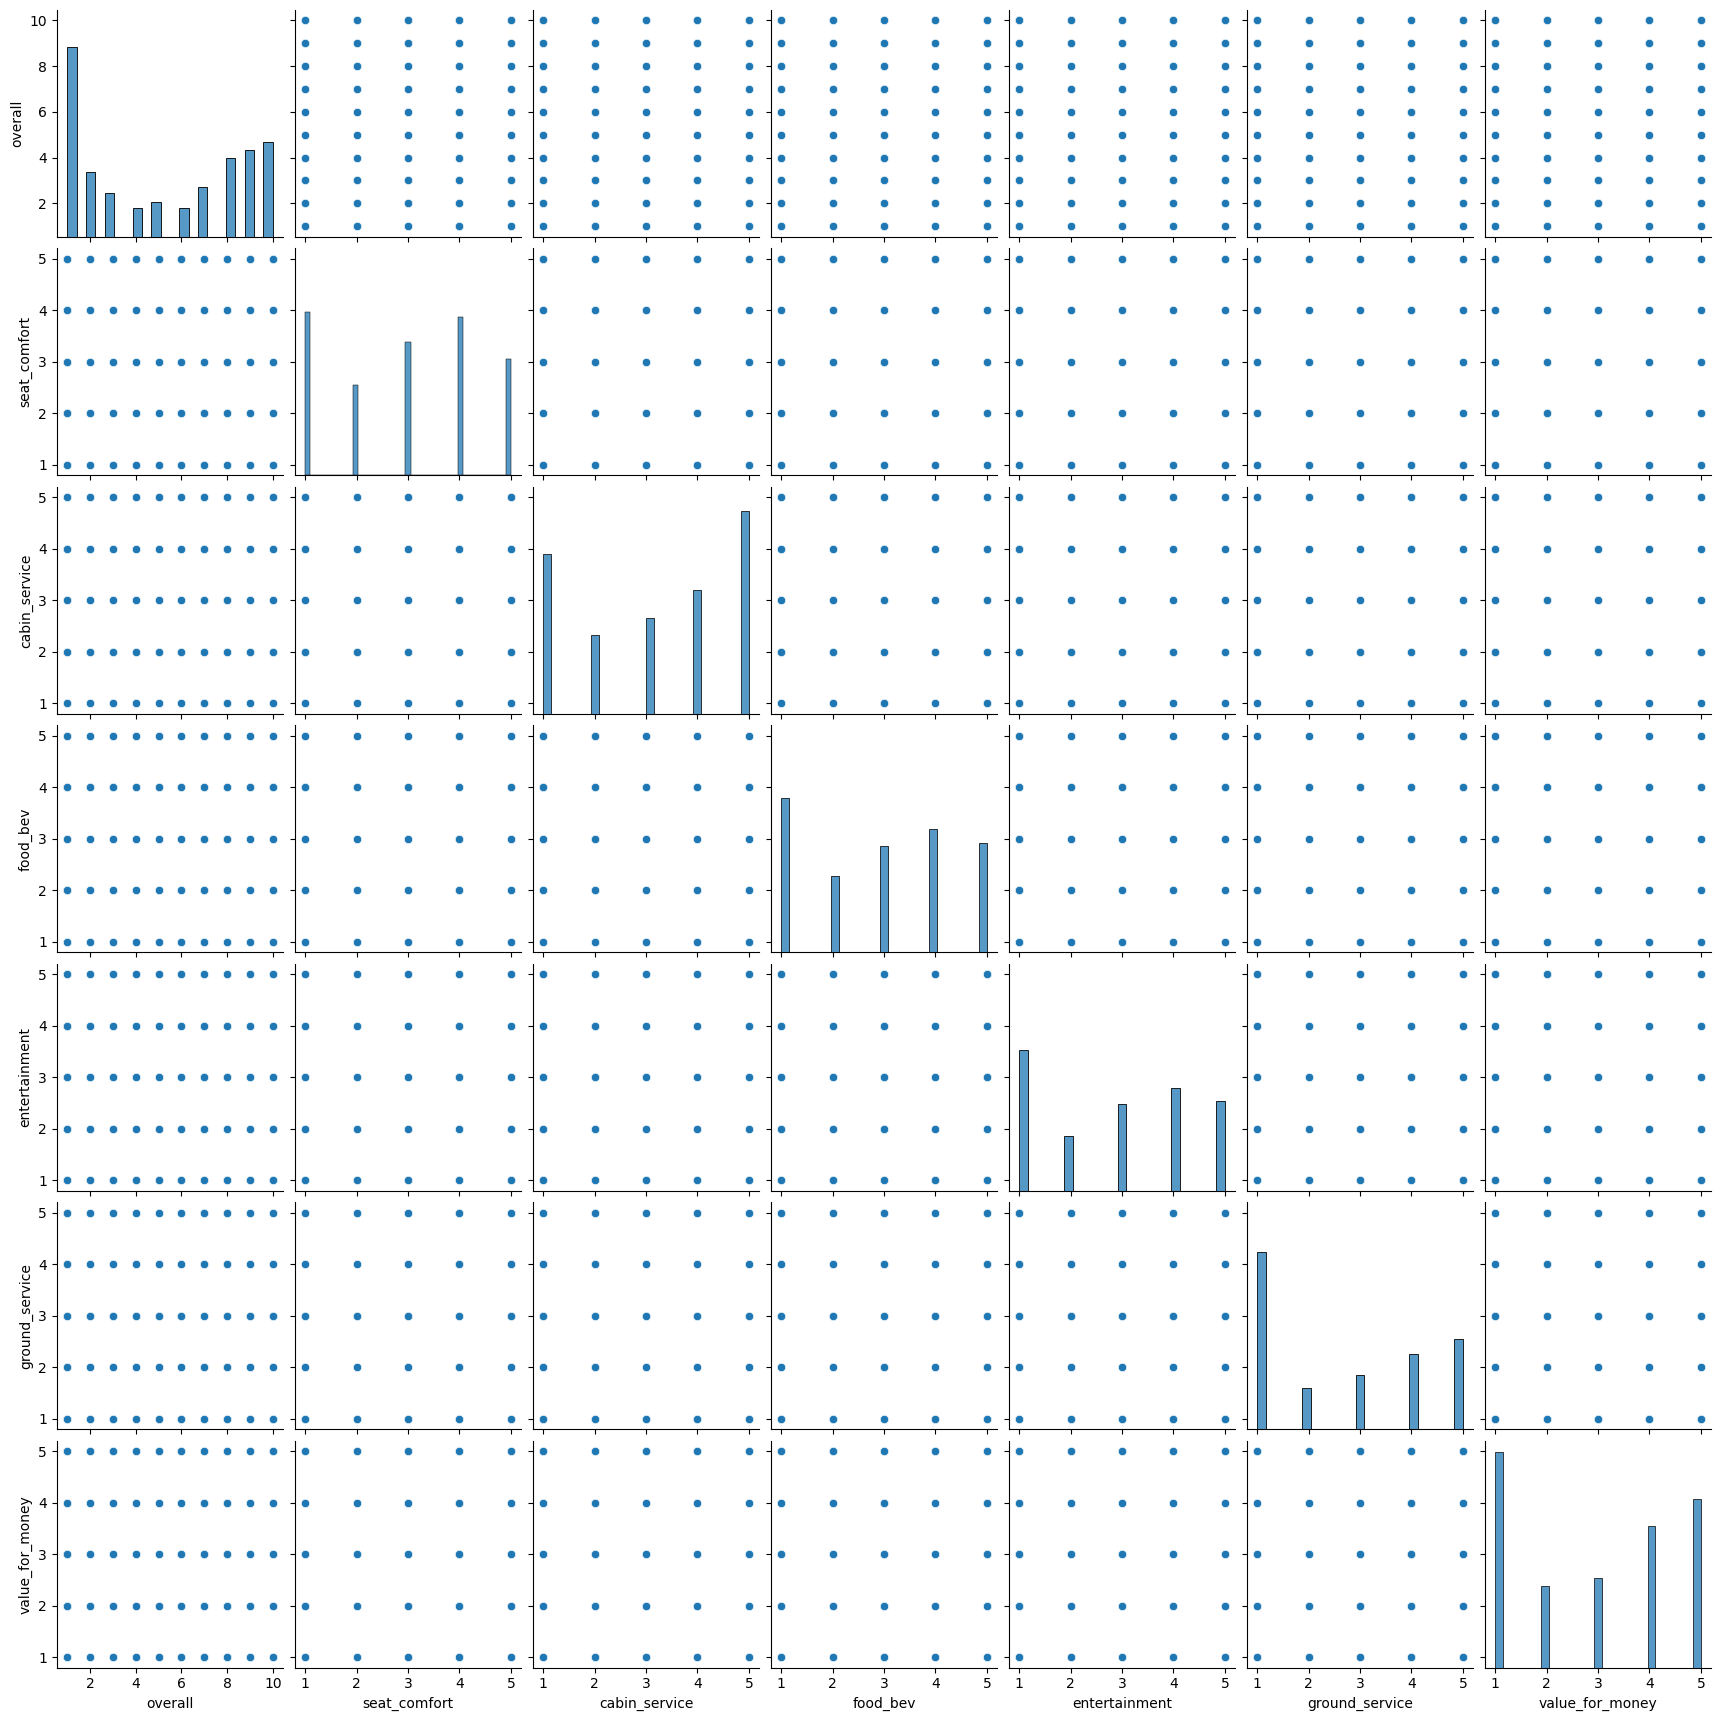

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above pairplot to plot pairwise relationships between variables within a dataset.

##### 2. What is/are the insight(s) found from the chart?

All the variables are cateegorical there is no such relations between them.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. 47.7% customers refer airlines to their friends.
2. 37.1% passengers were travelling for **solo leisure**.
3. 25.8% passengers were from Couple leisure category.

### Hypothetical Statement - 1

47.7% customers refer airlines to their friends.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: p = 0.477

Alternate Hypothesis : p > 0.477

Test Type: One proportion z-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
ztest_Score, p_value= proportions_ztest(count=48, nobs=100, value=0.477,alternative='larger')
print(round(p_value,2))

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis.")
else:
    print("we are accepting null hypothesis.")

0.48
we are accepting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have used one sample z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis can not be rejected and we can say about 47.7% customers refer airlines to their friends.

##### Why did you choose the specific statistical test?

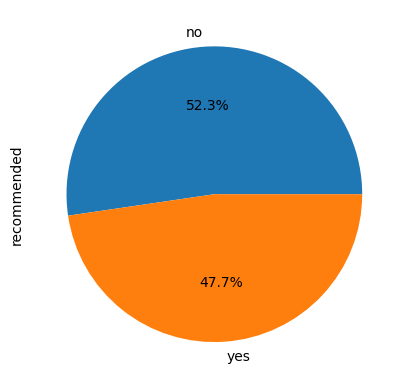

In [ ]:
df['recommended'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

As shown in the figure we can see 47.7% passengers refer to their friends.and 52.3% passengers dont refer it.

### Hypothetical Statement - 2

37.1% passengers were travelling for **solo leisure**.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: p = 0.371

Alternate Hypothesis : p > 0.371

Test Type: One proportion z-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
ztest_Score, p_value= proportions_ztest(count=38, nobs=100, value=0.371,alternative='larger')
print(round(p_value,2))

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

0.43
we are accepting null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have used One sample proportion Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis cannot be rejected and We can say 37.1% passengers were travelling for **solo leisure** but it may vary sometimes.

##### Why did you choose the specific statistical test?

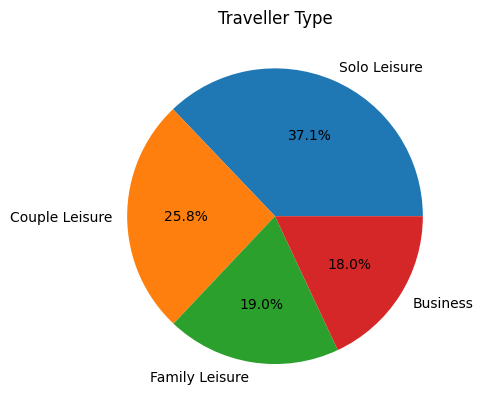

In [ ]:
ax =df['traveller_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set(ylabel=None)
plt.title('Traveller Type')
plt.show()

As shown in the figure we can see 37.1% traveller are from **Solo leisure**. I have used One proportion Z-Test directly.

### Hypothetical Statement - 3

25.8% passengers were from Couple leisure category.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: p = 0.258

Alternate Hypothesis : p > 0.258

Test Type: One proportion z-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
ztest_Score, p_value= proportions_ztest(count=38, nobs=100, value=0.371,alternative='larger')
print(round(p_value,2))

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

0.43
we are accepting null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have used one sample z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has not been rejected and we can say about 25.8% passengers were from **Couple leisure** category.

##### Why did you choose the specific statistical test?

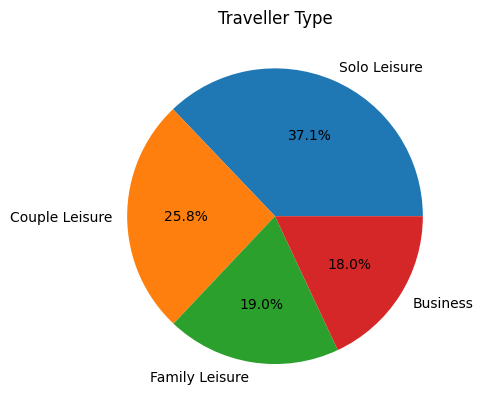

In [ ]:
ax =df['traveller_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set(ylabel=None)
plt.title('Traveller Type')
plt.show()

As shown in the figure we can see 25.8% customers are from Couple leisure category.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()/df.shape[0]*100

airline             0.001634
overall             2.914161
author              0.001634
review_date         0.001634
customer_review     0.001634
aircraft           69.782950
traveller_type     38.644090
cabin               4.051713
route              38.688219
date_flown         38.817338
seat_comfort        8.127942
cabin_service       8.080544
food_bev           20.990782
entertainment      34.247516
ground_service     39.250458
value_for_money     3.035107
recommended         2.325771
dtype: float64

In [ ]:
df.drop('aircraft',axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

* 'aircraft' column has most number of null values(70%). So we are gonna drop this column.
* Rest of the columns which consists null values. we are gonna drop null rows only.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

As our most of the independent variables and dependent variable are categorical. So we did not use any outlier detection and restriction technique.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
categorical_columns=list(set(df.columns.to_list()).difference(set(df.describe().columns.to_list())))
numerical_columns = df.describe().columns
print("Categorical Columns are :-", categorical_columns)

Categorical Columns are :- ['recommended', 'review_date', 'cabin', 'author', 'customer_review', 'date_flown', 'route', 'airline', 'traveller_type']


In [ ]:
for cat_col in categorical_columns:
  if cat_col not in ['date_flown','review_date']:
    le = LabelEncoder()
    df[cat_col] = le.fit_transform(df[cat_col])

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used **LabelEncoder()** to encode categorical values .Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
df.drop(['author','airline','route', 'date_flown', 'review_date', 'customer_review'],axis=1,inplace=True)

#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

* Author,Airline - This variable consists of many unique values like passenger names,IDs.It has a high variability soo we drop it.
* Route - Not needed for building our model.
* Date_flown - Not needed for building our model as it is not a time series data.
* Review_date - Similar to Date_flown
* Customer_review - Already all features are extracted from customer review.


##### Which all features you found important and why?

Rest of the features are important for our machine learning model.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

As our data doesnot have high variability . So we did not used any transformation in our data.

### 6. Data Scaling

##### Which method have you used to scale you data and why?

As our input data doesnot have high spread . We donot need to scale our data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

We already dropped all irrelevant columns . We already done dimensionality reduction.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
temp = df.copy()
y = temp['recommended'].values.reshape(-1,1)
temp.drop('recommended',axis=1,inplace=True)
x = temp.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=21)

##### What data splitting ratio have you used and why?

We split our data into 80:20 ratio. So we have 80% of our data into trainset and 20% data in testset.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Our dataset is balanced . we have approximately 50:50 ratio in our dataset

In [ ]:
# Handling Imbalanced Dataset (If needed)
df['recommended'].value_counts()

0    11757
1    11062
Name: recommended, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

## ***7. ML Model Implementation***

### ML Model - 1 (Logistic Regression)

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
lr = LogisticRegression()
# Fit the Algorithm
lr.fit(X_train,y_train)

# Predict on the model
y_pred = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print('Training time metrics :')
print('------------------------------------------------------')
print('Accuracy of Model : {}'.format(round(accuracy_score(y_train,y_pred),2)))
metric_logistic = classification_report(y_train,y_pred)
print(metric_logistic)

Training time metrics :
------------------------------------------------------
Accuracy of Model : 0.96
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9418
           1       0.95      0.96      0.96      8837

    accuracy                           0.96     18255
   macro avg       0.96      0.96      0.96     18255
weighted avg       0.96      0.96      0.96     18255



In [ ]:
print('Testing time metrics :')
print('------------------------------------------------------')
print('Accuracy of Model : {}'.format(round(accuracy_score(y_test,y_pred_test),2)))
metric_logistic = classification_report(y_test,y_pred_test)
print(metric_logistic)

Testing time metrics :
------------------------------------------------------
Accuracy of Model : 0.96
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2339
           1       0.96      0.95      0.96      2225

    accuracy                           0.96      4564
   macro avg       0.96      0.96      0.96      4564
weighted avg       0.96      0.96      0.96      4564



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
estimator = LogisticRegression()
params = {'penalty' : ['l1', 'l2', 'elasticnet', None]}
# Fit the Algorithm
cv = GridSearchCV(estimator=estimator,param_grid=params,cv=3)
cv.fit(X_train,y_train)
# Predict on the model
y_pred_cv = cv.predict(X_test)

In [ ]:
cv.best_params_

{'penalty': None}

In [ ]:
round(cv.best_score_,2)

0.96

##### Which hyperparameter optimization technique have you used and why?

I used GridSearCV module from Scikit-learn module.GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.we pass predefined values for hyperparameters to the GridSearchCV function. We do this by defining a dictionary in which we mention a particular hyperparameter along with the values it can take.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no improvement in our metrics. Accuracy is same.

### ML Model - 2 (Decision Tree Classifier)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Initializing Decision Tree Regressor model
from sklearn.tree import DecisionTreeClassifier
dtree_classifier = DecisionTreeClassifier()
# Fitting our model
dtree_classifier.fit(X_train,y_train)
# Predicting results
y_pred_dtree = dtree_classifier.predict(X_train)
y_pred_dtree_test = dtree_classifier.predict(X_test)

In [ ]:
print('Training time metrics :')
print('------------------------------------------------------')
print('Accuracy of Model : {}'.format(round(accuracy_score(y_train,y_pred_dtree),2)))
metric_dtree = classification_report(y_train,y_pred_dtree)
print(metric_dtree)

Training time metrics :
------------------------------------------------------
Accuracy of Model : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9418
           1       1.00      1.00      1.00      8837

    accuracy                           1.00     18255
   macro avg       1.00      1.00      1.00     18255
weighted avg       1.00      1.00      1.00     18255



In [ ]:
print('Testing time metrics :')
print('------------------------------------------------------')
print('Accuracy of Model : {}'.format(round(accuracy_score(y_test,y_pred_dtree_test),2)))
metric_dtree = classification_report(y_test,y_pred_dtree_test)
print(metric_dtree)

Testing time metrics :
------------------------------------------------------
Accuracy of Model : 0.94
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2339
           1       0.94      0.94      0.94      2225

    accuracy                           0.94      4564
   macro avg       0.94      0.94      0.94      4564
weighted avg       0.94      0.94      0.94      4564



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
estimator = DecisionTreeClassifier()
params = {'max_depth':[None,1,2,3,4,5,6,7,8,9,10,11],
          'min_samples_split':[i for i in range(26)]}
# Fit the Algorithm
cv_dtree = GridSearchCV(estimator=estimator,param_grid=params,cv=3)
cv_dtree.fit(X_train,y_train)
# Predict on the model
y_pred_cv = cv_dtree.predict(X_test)

In [ ]:
cv_dtree.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [ ]:
dtree_optimized = DecisionTreeClassifier(max_depth=4, min_samples_split=2)
dtree_optimized.fit(X_train,y_train)
y_pred_train_dtree_optimized = dtree_optimized.predict(X_train)
y_pred_test_dtree_optimized = dtree_optimized.predict(X_test)

In [ ]:
print('Training time metrics :')
print('------------------------------------------------------')
print('Accuracy of Model : {}'.format(round(accuracy_score(y_train,y_pred_train_dtree_optimized),2)))
metric_dtree_optimized = classification_report(y_train,y_pred_train_dtree_optimized)
print(metric_dtree_optimized)

Training time metrics :
------------------------------------------------------
Accuracy of Model : 0.96
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9418
           1       0.96      0.95      0.96      8837

    accuracy                           0.96     18255
   macro avg       0.96      0.96      0.96     18255
weighted avg       0.96      0.96      0.96     18255



In [ ]:
print('Testing time metrics :')
print('------------------------------------------------------')
print('Accuracy of Model : {}'.format(round(accuracy_score(y_test,y_pred_test_dtree_optimized),2)))
metric_dtree_optimized = classification_report(y_test,y_pred_test_dtree_optimized)
print(metric_dtree_optimized)

Testing time metrics :
------------------------------------------------------
Accuracy of Model : 0.96
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2339
           1       0.97      0.95      0.96      2225

    accuracy                           0.96      4564
   macro avg       0.96      0.96      0.96      4564
weighted avg       0.96      0.96      0.96      4564



##### Which hyperparameter optimization technique have you used and why?

I used GridSearCV module from Scikit-learn module.GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.we pass predefined values for hyperparameters to the GridSearchCV function. We do this by defining a dictionary in which we mention a particular hyperparameter along with the values it can take.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After Hyperparameter tuning we got many changes in our metrics :

1. Our model was overfitted previously.After tuning our metrics improved. Training accuracy and Testing accuracy both was **0.96**.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Model 1(Logistic Regression) and Model 2(DecisonTree Classifier) both had same accuracy of **0.96**.

### ML Model - 3 (Random Forest Classifier)

In [ ]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier()
# Fit the Algorithm
random_classifier.fit(X_train,y_train)
# Predicting results
y_pred_random = random_classifier.predict(X_train)
y_pred_random_test = random_classifier.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print('Training time metrics :')
print('------------------------------------------------------')
print('Accuracy of Model : {}'.format(round(accuracy_score(y_train,y_pred_random),2)))
metric_random = classification_report(y_train,y_pred_random)
print(metric_random)

Training time metrics :
------------------------------------------------------
Accuracy of Model : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9418
           1       1.00      1.00      1.00      8837

    accuracy                           1.00     18255
   macro avg       1.00      1.00      1.00     18255
weighted avg       1.00      1.00      1.00     18255



In [ ]:
print('Testing time metrics :')
print('------------------------------------------------------')
print('Accuracy of Model : {}'.format(round(accuracy_score(y_test,y_pred_random_test),2)))
metric_random = classification_report(y_test,y_pred_random_test)
print(metric_random)

Testing time metrics :
------------------------------------------------------
Accuracy of Model : 0.96
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2339
           1       0.96      0.95      0.95      2225

    accuracy                           0.96      4564
   macro avg       0.96      0.96      0.96      4564
weighted avg       0.96      0.96      0.96      4564



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
estimator = RandomForestClassifier()
params = {'max_depth':[8,9,10,11],
          'min_samples_split':[10,15,20,25],
          'n_estimators':[100,150,200]}
# Fit the Algorithm
cv_random = GridSearchCV(estimator=estimator,param_grid=params,cv=3)
cv_random.fit(X_train,y_train)
# Predict on the model
y_pred_cv = cv_random.predict(X_test)

In [ ]:
cv_random.best_params_

{'max_depth': 9, 'min_samples_split': 20, 'n_estimators': 150}

In [ ]:
rforest_optimized = RandomForestClassifier(max_depth= 9, min_samples_split = 25, n_estimators=100)
rforest_optimized.fit(X_train,y_train)
y_pred_train_rforest_optimized = rforest_optimized.predict(X_train)
y_pred_test_rforest_optimized = rforest_optimized.predict(X_test)

In [ ]:
print('Training time metrics :')
print('------------------------------------------------------')
print('Accuracy of Model : {}'.format(round(accuracy_score(y_train,y_pred_train_rforest_optimized),2)))
metric_rforest_optimized = classification_report(y_train,y_pred_train_rforest_optimized)
print(metric_rforest_optimized)

Training time metrics :
------------------------------------------------------
Accuracy of Model : 0.96
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      9418
           1       0.96      0.96      0.96      8837

    accuracy                           0.96     18255
   macro avg       0.96      0.96      0.96     18255
weighted avg       0.96      0.96      0.96     18255



In [ ]:
print('Testing time metrics :')
print('------------------------------------------------------')
print('Accuracy of Model : {}'.format(round(accuracy_score(y_test,y_pred_test_rforest_optimized),2)))
metric_rforest_optimized = classification_report(y_test,y_pred_test_rforest_optimized)
print(metric_rforest_optimized)

Testing time metrics :
------------------------------------------------------
Accuracy of Model : 0.96
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2339
           1       0.96      0.95      0.96      2225

    accuracy                           0.96      4564
   macro avg       0.96      0.96      0.96      4564
weighted avg       0.96      0.96      0.96      4564



##### Which hyperparameter optimization technique have you used and why?

I used GridSearCV module from Scikit-learn module.GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.we pass predefined values for hyperparameters to the GridSearchCV function. We do this by defining a dictionary in which we mention a particular hyperparameter along with the values it can take.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After Hyperparameter tuning we got many changes in our metrics :

1. Our model was overfitted previously.After tuning our metrics improved. Training accuracy and Testing accuracy both was **0.96**.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In lclassification problems we have metrics like Accuracy,Precision,Recall,f1 score. Our aim is to decrease the value of Precison,Recall and increase the value of Accuracy Score,f1 score.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

All of our models gives us same accuracy on both train and test sets. So we can use any one of three models.I am using Random forest classifier model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=790d246e1126987046f04d8a4718840c97a00a5f99929993c4e097263de5a5b7
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5 as eli
eli.explain_weights(rforest_optimized)

Weight,Feature
0.4573 ± 0.7244,x0
0.2458 ± 0.6491,x8
0.0984 ± 0.3976,x4
0.0831 ± 0.3459,x7
0.0641 ± 0.3108,x3
0.0332 ± 0.2043,x5
0.0133 ± 0.1089,x6
0.0026 ± 0.0018,x1
0.0021 ± 0.0017,x2


To start with, we can use explain_weights() to find the weight given to each feature in prediction. For tree-based models, ELI5 does nothing new for calculating feature weights. It simply uses the GINI index used for preparing decision trees as weights.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
file = open('model_random_forest.pkl', 'wb')
pickle.dump(rforest_optimized,file)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
file = open('model_random_forest.pkl', 'rb')
model = pickle.load(file)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This study focused on predicting the airline passenger referral prediction using given dataset. Classification techniques like Logistic Regression, Decision Tree Classifier, Random Forest Classifier are used to predict the referal prediction. This statistical data analysis shows interesting outcomes in prediction method and also in an exploratory analysis.

Feature and Labels had a strong linear relationship; hence the prediction from the linear model was very good.  Best  predictions  are  obtained  with  a RandomForest Classifier model with an accuracy score of 0.96 on both train and test datasets.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***